In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Load the configuration from config.json
with open('config.json', 'r') as f:
    config = json.load(f)

start_date = config['START_DATE']
end_date = config['END_DATE']
stocks = config['STOCKS']

In [3]:
# Generate a business day date range to match trading days
date_range = pd.bdate_range(start=start_date, end=end_date)

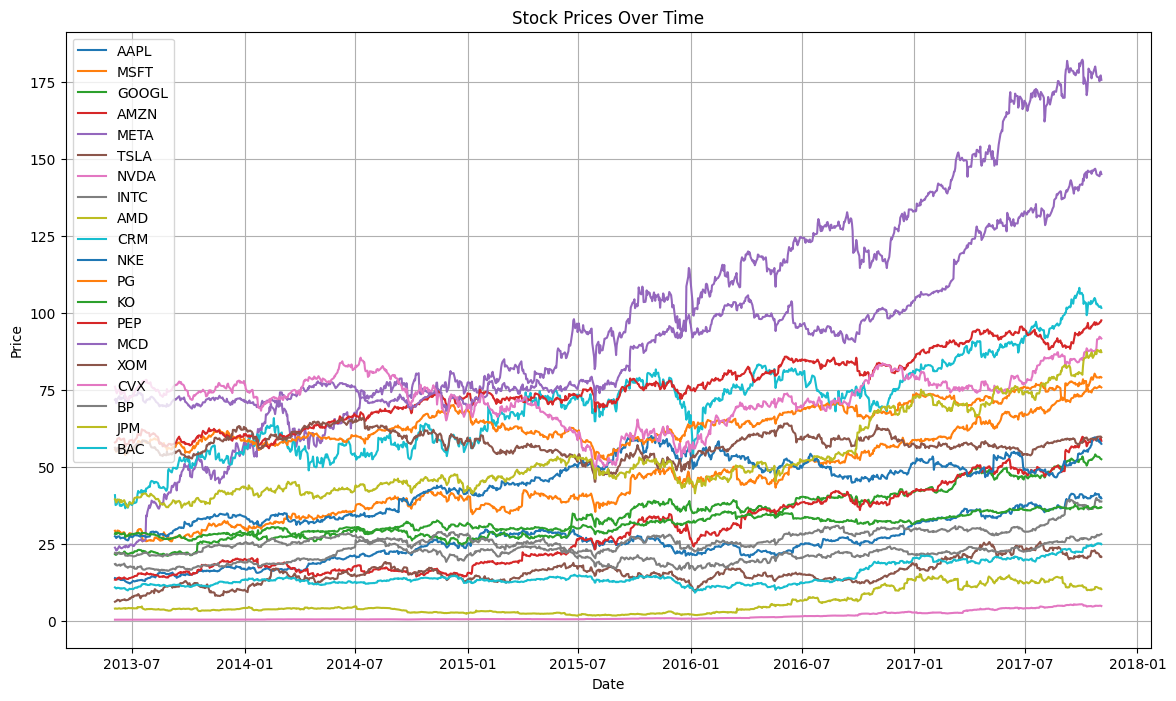

In [4]:
plt.figure(figsize=(14, 8))

for stock in stocks:
    # Load the stock data from the corresponding .txt file
    with open(f'InputData/{stock}.txt', 'r') as f:
        stock_data = [float(line.strip()) for line in f.readlines()]
    
    # Ensure stock data length matches trading days
    min_length = min(len(stock_data), len(date_range))
    stock_data = stock_data[:min_length]
    trimmed_date_range = date_range[:min_length]
    
    # Create a DataFrame
    stock_df = pd.DataFrame({
        'Date': trimmed_date_range,
        'Price': stock_data
    })
    stock_df.set_index('Date', inplace=True)
    stock_df = stock_df.asfreq('B').ffill()  # Ensure only business days and fill missing values
    
    # Plot the stock data
    plt.plot(stock_df.index, stock_df['Price'], label=stock)

# Add labels and legend
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

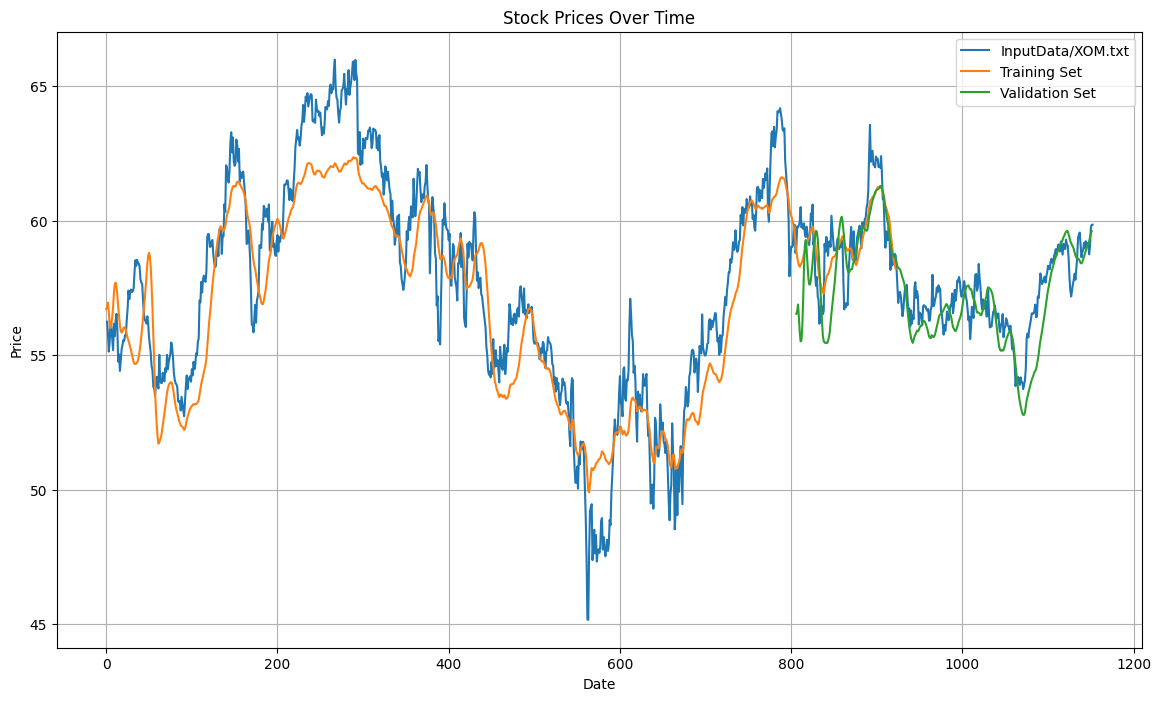

In [6]:
import numpy as np
# Plot each stock's data
plt.figure(figsize=(14, 8))

predictDaysAhead = 3
maintxt = "InputData/XOM.txt"
trainedtxt = "Trainedpredicitons.txt"
veriftxt = "VerificationPredictions.txt"

with open(maintxt, 'r') as f:
    stock_data = [float(line.strip()) for line in f.readlines()]

for i in range(predictDaysAhead):
    stock_data.pop()

with open(trainedtxt, 'r') as f:
    train_data = [float(line.strip()) for line in f.readlines()]

with open(veriftxt, 'r') as f:
    verif_data = [float(line.strip()) for line in f.readlines()]


# Plot the stock data
count_array = np.arange(1, len(stock_data) + 1)
plt.plot(count_array,stock_data, label=maintxt)
count_array = np.arange(1, len(train_data) + 1)
plt.plot(train_data, label="Training Set")
count_array = np.arange(len(stock_data) - len(verif_data), len(stock_data))
plt.plot(count_array, verif_data, label="Validation Set")




# Add labels and legend
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()